PREPARATION MARKDOWN:

Filter true data/ run some clustering and theta estimation

In [3]:
objectMasterResult = open("../bin/MASTERCNR_EGFRINH_CNRRESULT.pickle", "rb")
masterCnrResult = pickle.load(objectMasterResult)

x = np.square(masterCnrResult.residuals_incomplete)
y = np.square(masterCnrResult.residuals_complete)

print(x.sum(axis=1))
print(y.sum(axis=1))

#for col in masterCnrResult.stot["vehicle"].head():
#    print(col)
 #   print(masterCnrResult.stot["vehicle"].loc[col,col])
 #   print(masterCnrResult.stot["AG1478"].loc[col,col])
 #   print("\n")


n_res = np.size(masterCnrResult.residuals_complete) + np.size(masterCnrResult.residuals_incomplete)
error = 0
error += np.sum(np.array(np.square(masterCnrResult.residuals_complete)))/n_res
error += np.sum(np.array(np.square(masterCnrResult.residuals_incomplete)))/n_res

print(error)


RSK           7.423997
CFOS          4.351650
CJUN          5.560650
EGFR         11.064004
p90RSK        8.586389
MTOR          5.751163
RPS6          7.588069
ITGB1         7.360065
RB          829.453593
CDC2          6.601386
CMYC          3.307147
H2A          10.540094
H3            3.540264
CDK4          3.601681
BMPR          2.527133
CREB          5.188249
P38D          3.652680
MKK36         4.777735
P65           4.469544
GSK3B         4.689012
MAPKAP2       6.537862
P38           3.336925
BMP           4.163297
STAT1        13.203859
STAT3         4.324562
STAT5         7.291653
FRZ           4.147725
LRP6          2.391678
CYCLINB1      2.423738
CYCLINE       3.316329
PLCG1        12.833021
PLCG2        23.047825
EPHRINB3      4.531477
IGFBP3        4.782420
dtype: float64
ERK12       4.079162
AKT1        6.058181
AKT123      4.304056
JNK        10.620845
FAK         4.897968
JAK1        6.108783
SRC         5.889687
RELA        6.039358
IKBA        6.526592
SMAD159     6.

In [24]:
n_res = np.size(x1) + \
        np.size(y1)
ssrFully = 0.0
ssrFully += np.sum(np.array(np.square(x1)))/n_res
ssrFully += np.sum(np.array(np.square(y1)))/n_res
print(ssrFully)

n_res = np.size(x2) + \
        np.size(y2)
ssrFully = 0.0
ssrFully += np.sum(np.array(np.square(x2)))/n_res
ssrFully += np.sum(np.array(np.square(y2)))/n_res
print(ssrFully)


3.301941784096511
3.5392491322236928


In [6]:
# RUN ANALYSIS WITHOUT ANY TOTAL PROTEIN AND SEE HOW IT CHANGES RECONSTRUCTION
#global scCNR parameters

THETA = 0.009 #0.02  0.0075

finalProcessedEGFRInhData = pd.read_csv("../bin/EGFRInhibitionDataProcessed.tsv",sep='\t')
results = []
errorList = []
rglob, rtot, cell_annot, tx_annot, group_annot = prepare_data_for_EGFR_inhibition(finalProcessedEGFRInhData)
assert(cell_annot is None)
assert(tx_annot is None)

scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)

p = scmra.ScCnrProblem(scd, eta=0.0, theta=THETA, prior_network = CANNONICAL_EDGES) 
p.cpx.solve()
s = scmra.ScCnrResult(p)

#NUMBER OF FDIFFERENT EDGES
deviatingEdgeNum = 0
indicatorList = []
for indicator, status in s.vardict.items():
    if(indicator.startswith(("IDev")) and status==1):
        indicatorList.append(indicator)
        deviatingEdgeNum = deviatingEdgeNum + 1
print(deviatingEdgeNum)
print(indicatorList)
#THE ACTUAL ERROR SCORE
n_res = np.size(s.residuals_complete) + np.size(s.residuals_incomplete)
error = 0
error += np.sum(np.array(np.square(s.residuals_complete)))/n_res
error += np.sum(np.array(np.square(s.residuals_incomplete)))/n_res
trueError = error
print(error)

x2 = np.square(s.residuals_incomplete)
y2 = np.square(s.residuals_complete)
#print(x2.sum(axis=1))
#print(y2.sum(axis=1))

{'vehicle': array(['plate.1.162', 'plate.1.169', 'plate.1.171', 'plate.1.179',
       'plate.1.190', 'plate.1.191', 'plate.1.196', 'plate.1.199',
       'plate.1.203', 'plate.1.205', 'plate.1.212', 'plate.1.213',
       'plate.1.215', 'plate.1.230', 'plate.1.233', 'plate.1.234',
       'plate.1.244', 'plate.2.152', 'plate.2.155', 'plate.2.159',
       'plate.2.170', 'plate.2.173', 'plate.2.180', 'plate.2.187',
       'plate.2.192', 'plate.2.193', 'plate.2.203', 'plate.2.204',
       'plate.2.212', 'plate.2.214', 'plate.2.224', 'plate.2.225',
       'plate.2.235', 'plate.3.164', 'plate.3.166', 'plate.3.173',
       'plate.3.182', 'plate.3.184', 'plate.3.185', 'plate.3.187',
       'plate.3.191', 'plate.3.199', 'plate.3.204', 'plate.3.206',
       'plate.3.209', 'plate.3.213', 'plate.3.225', 'plate.3.227',
       'plate.3.231', 'plate.3.237', 'plate.4.162', 'plate.4.168',
       'plate.4.181', 'plate.4.187', 'plate.4.200', 'plate.4.202',
       'plate.4.207', 'plate.4.210', 'plate.4.211'

/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/4_EGFR_INHIBITOR/../../helperScripts/IDseqHelperFunctions.py:404: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  rglob_cnr = rglob_cnr.sum(level=0) #sum rows of same index (e.g. two ABs measure same protein)
/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/4_EGFR_INHIBITOR/../../helperScripts/IDseqHelperFunctions.py:413: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  rtot_cnr = rtot_cnr.sum(level=0) #sum rows of same index (e.g. two ABs measure same protein)


Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 562.487589 after 0.00 sec. (0.72 ticks)
Tried aggregator 2 times.
MIQP Presolve eliminated 7442 rows and 11583 columns.
Aggregator did 11 substitutions.
Reduced MIQP has 2299 rows, 2310 columns, and 4598 nonzeros.
Reduced MIQP has 0 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQP objective Q matrix has 2310 nonzeros.
Presolve time = 0.01 sec. (10.37 ticks)
Tried aggregator 1 time.
MIQP Presolve eliminated 2090 rows and 2100 columns.
Reduced MIQP has 209 rows, 210 columns, and 418 nonzeros.
Reduced MIQP has 0 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQP objective Q matrix has 210 nonzeros.
Presolve time = 0.00 sec. (1.35 ticks)
Tried aggregator 1 time.
Reduced MIQP has 209 rows, 210 columns, and 418 nonzeros.
Reduced MIQP has 0 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQP objective Q matrix has 210 nonzeros.
Presol

In [1]:
import sys
sys.path.insert(0, '../../helperScripts/')
from IDseqHelperFunctions import *

import scmra
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd
from datetime import datetime
import pickle
import seaborn as sns; sns.set_theme()
from matplotlib.pyplot import figure
import scmra
import itertools
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#distribution of distances in cell space
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

import random


def write_edge_subpopulation_differences(trueEdges, recoveredEdges, nameExtension):
    #WRITE ASLSO THE SEPERATE ANALYSES INTO A TSV FILE
    objectMasterResult = open(trueEdges, "rb")
    MASTERCNR = pickle.load(objectMasterResult) #the first solution, which edges we will take

    file = open(recoveredEdges,"rb")
    resultPermSimulations = pickle.load(file)

    #get all different edges
    colsToKeep = []
    for indicator, status in MASTERCNR.vardict.items():
        if(indicator.startswith(("IDev")) and status==1):
            indSplit = indicator.split("_")
            colsToKeep.append(indSplit[1] + "_" + indSplit[2])
    #subset these column now
    resultEdgePerm = []
    for i in resultPermSimulations:
        df = i[colsToKeep]
        resultEdgePerm.append(df)
    print(colsToKeep)

    #WRITE THE EDGE DIFFERENCES BETWEEN TREATMENT/PRB AND VEHICLE INTO A TSV
    cols = ["GROUP","EDGE","VALUE"]
    dfEdgeDiff = pd.DataFrame(columns = cols)
    for i in resultEdgePerm:
        colName = i.columns
        rowNames = i.index
        for col in colName:
            for row in rowNames:
                if(not row=="vehicle"):
                    arr = [row, col, i.loc["vehicle", col] - i.loc[row, col]]
                    dfEdgeDiff = pd.concat([dfEdgeDiff, pd.DataFrame([arr], columns=["GROUP","EDGE","VALUE"])], axis=0)

    dfEdgeDiff.to_csv("../bin/edgePermutationAnalysis" + nameExtension + ".tsv", sep="\t")

    #WRITE THE EDGE DIFFERENCES FORM MASTERCNR TO A TSV
    cols = ["GROUP","EDGE","VALUE"]
    truePoint = pd.DataFrame(columns = cols)
    populations = list(MASTERCNR.rloc.keys())
    populations.remove("vehicle")
    for edge in colsToKeep:
        for pop in populations:
            toFromList = edge.split("_")
            val = MASTERCNR.rloc["vehicle"].loc[toFromList[0], toFromList[1]] - MASTERCNR.rloc[pop].loc[toFromList[0], toFromList[1]]
            arr = [pop, edge, val]
            truePoint = pd.concat([truePoint, pd.DataFrame([arr], columns=["GROUP","EDGE","VALUE"])], axis=0)

    truePoint.to_csv("../bin/edgePermutationAnalysisTrueDifferences" + nameExtension + ".tsv", sep="\t")

def shuffle_group_label(group_annot):
    keys = list(group_annot.keys())
    keyValueNumber = {}
    valueList= []
    for key in keys:
        keyValueNumber[key] = len(group_annot[key])
        valueList.append(group_annot[key])

    valueList = [item for sublist in valueList for item in sublist]

    group_annot_return = {}
    assert(len(keys) == 2)
    group_annot_return[keys[0]] = random.sample(valueList, keyValueNumber[keys[0]])
    group_annot_return[keys[1]] = list(set(valueList) - set(group_annot_return[keys[0]]))

    return(group_annot_return)

def shuffle_group_label_3labels(group_annot):
    keys = list(group_annot.keys())
    keyValueNumber = {}
    valueList= []
    for key in keys:
        keyValueNumber[key] = len(group_annot[key])
        valueList.append(group_annot[key])

    valueList = [item for sublist in valueList for item in sublist]

    group_annot_return = {}
    assert(len(keys) == 3)
    group_annot_return[keys[0]] = random.sample(valueList, keyValueNumber[keys[0]])
    group_annot_return[keys[1]] = random.sample(list(set(valueList) - set(group_annot_return[keys[0]])), keyValueNumber[keys[1]])
    listSoFar = list(set(valueList) - set(group_annot_return[keys[0]]))
    listSoFar = list(set(listSoFar) - set(group_annot_return[keys[1]]))
    group_annot_return[keys[2]] = random.sample(listSoFar, keyValueNumber[keys[2]])

    return(group_annot_return)

def get_pairwise_distances(data, method = 'cosine', seperate_z_scale = False, minmax = False):
    def upper_tri_indexing(A):
        m = A.shape[0]
        r,c = np.triu_indices(m,1)
        return A[r,c]


    # Z-NORMALIZE DATA
    scaledForGroup = None
    if(seperate_z_scale and not minmax):
        for group in np.unique(data['treatment']):
            data_values = data[data['treatment'] == group].drop(['sample_id', 'treatment'], axis=1).values
            scaledForGroupAddon = StandardScaler().fit_transform(data_values)
            if(scaledForGroup is None):
                scaledForGroup = scaledForGroupAddon
            else:
                scaledForGroup = np.concatenate((scaledForGroup, scaledForGroupAddon), axis=0)
        data = scaledForGroup
    elif(not minmax):
        data_values = data.drop(['sample_id', 'treatment'], axis=1).values
        data = StandardScaler().fit_transform(data_values)

    if(minmax):
        data_values = data.drop(['sample_id', 'treatment'], axis=1).values
        scaler = MinMaxScaler()
        scaler.fit(data_values)
        data = scaler.transform(data_values)

    #EGF_DATA ROW=cell columns=FEATURES (cells in rows)
    #pairwiseDistances diagonal is zero, upper triangular matrix: row=from, col=to (dsitance of cell in row 0 to cell 9 is pairwise[0,9])
    pairwiseDistances = pairwise_distances(data, metric=method)
    
    #list: only to visualize distances (other than that not an interesting data structure)
    disList = upper_tri_indexing(pairwiseDistances)

    import matplotlib.pyplot as plt
    plt.hist(disList, bins=100)
    plt.show()

    return(pairwiseDistances)

def map_string_to_ints(stringList):
    mydict={}
    i = 0
    for item in stringList:
        if(i>0 and item in mydict):
            continue
        else:    
            i = i+1
            mydict[item] = i
    k=[]
    for item in stringList:
        k.append(mydict[item])
    return(k)

def plot_graph(data, subset = None, removeIsolates = True, threshold = 0.65, method = 'cosine', protein = 'JNK-p', treatmentColor = False,
                rescaleToGroup = False, labelBYRank = False, seperate_z_scale = False, subset_data = None, edgeMap = False):

    localData = data.copy()

    adjMat = get_pairwise_distances(localData, method = method, seperate_z_scale = seperate_z_scale)
    adjMat[adjMat > threshold] = 0

    G = nx.from_numpy_array(adjMat)
    G.edges(data=True)

    #remove isolate nodes, they r not useful for graph matching
    if(removeIsolates):
        G.remove_nodes_from(list(nx.isolates(G)))
        #components smaller than...
        theshold_cluster_size = 3
        for component in list(nx.connected_components(G)):
            if len(component)<theshold_cluster_size:
                for node in component:
                    G.remove_node(node)

    #get colour scheme
    plotData = localData.copy()

    plotData = plotData.reset_index()
    index = plotData.index

    color_map = []
    if(treatmentColor):
        for node in G:
            color_map.append(plotData['treatment'][node])
        color_map = map_string_to_ints(color_map)
        minVal = 1
        maxVal = len(np.unique(color_map))
    else:
        ranksPerGroup = {}
        if(rescaleToGroup):
            for group in subset:
                ranksPerGroup[group] = ss.rankdata(plotData[plotData['treatment'] == group][protein])
                plotData.loc[plotData['cluster_id'] == group, 'rank'] = ranksPerGroup[group]
            for node in G:
                color_map.append(plotData['rank'][node]) #bcs ranks are 1-based indexed
        else:  
            for node in G:
                color_map.append(plotData[protein][node])
                #MIN and MAX values are values in range of WHOLE dataset and not only subset to see differences
        minVal = np.min(plotData[protein])
        maxVal = np.max(plotData[protein])

    if(edgeMap):
        edge_map = []
        for node in G:
            edge_map.append(len(G.edges(node)))
        minVal = np.min(edge_map)
        maxVal = np.max(edge_map)
        meanEdge = np.mean(edge_map)
        removeNodes = []
        for node in G:
            if(len(G.edges(node)) < meanEdge/4):
                removeNodes.append(node)
        #remove node and calculte edge map new
        for node in removeNodes:
            G.remove_node(node)
        edge_map = []
        for node in G:
            edge_map.append(len(G.edges(node)))
            
        color_map = edge_map

    #treamtnt col overwriting edge color, so we can reduce edges but color by treatment :D 
    if(treatmentColor):
        color_map = []
        for node in G:
            color_map.append(plotData['treatment'][node])
        color_map = map_string_to_ints(color_map)
        minVal = 1
        maxVal = len(np.unique(color_map))

    labeldict = {}
    if(labelBYRank):
        for group in subset:
            ranksPerGroup = ss.rankdata(plotData[plotData['cluster_id'] == group][protein])
            plotData.loc[plotData['cluster_id'] == group, 'rank'] = ranksPerGroup

        keys = []
        vals = []
        for node in G:
            val = plotData['rank'][node]
            strVal = ""
            #if(val < 10 or val > 150):
            if(val):
                strVal = str(val)
            vals.append(strVal)
            keys.append(node)
        labeldict = dict(zip(keys,vals))


    #LRP6_P
    #NFKB_P65_P
    #RIBOSOMAL_S6_P
    fig,ax = plt.subplots(figsize=(15, 10), dpi=80)
    pos = nx.spring_layout(G, seed=225)  # Seed for reproducible layout
    nx.draw(G, pos, with_labels=True, labels=labeldict, node_size = 350, alpha = 0.7, cmap='viridis', node_color=color_map, vmin=minVal, vmax=maxVal)
    #nx.draw(G, pos, with_labels=False, node_size = 150, alpha = 0.5, cmap=plt.cm.Reds, node_color = edge_map)

    plt.show(fig)

    return G

def plot_3d(xs, ys, zs):  
    fig,ax = plt.subplots(figsize=(15, 10), dpi=80)
    ax = fig.add_subplot(projection='3d')
    n = 100
    ax.scatter(xs, ys, zs, s=80)

    ax.set_xlabel('DIM 1')
    ax.set_ylabel('DIM 2')
    ax.set_zlabel('DIM 3')

    plt.show()

def plot_net(dfData, threshold=0.6):
    import igraph as ig
    import leidenalg as la

    adjMat = get_pairwise_distances(dfData, method = "cosine")

    adjMat[adjMat > threshold] = 0
    adjMat[adjMat > 0] = 1

    adjMat = np.asmatrix(adjMat)
    G = ig.Graph.Adjacency(adjMat)
    #make an edge list with weights for Leiden clustering
    partition = la.find_partition(G, la.ModularityVertexPartition,n_iterations=20)#, weights = weightVec)

    #label the cluster name
    partitionVec = []
    clusterDict = {}
    pNum = (0)
    for p in partition:
        if(len(p) < 5): continue
        curList = []
        for node in p:
            curList.append(str(node))
            clusterDict[node] = str(pNum)
        partitionVec.append((curList))
        pNum += 1
    tmp = dfData.copy()
    tmp.reset_index(inplace=True)
    tmp = tmp.rename(columns = {'index':'ab_name'})
    x = tmp["ab_name"].map(clusterDict)

    ig.plot(partition, vertex_label = x, seed = 1) 

normalizedDataFile = "./IDSEQ_EGFRINH_NORMALIZED.tsv"
data = pd.read_csv(normalizedDataFile, sep='\t')

#subset the data
dataOrigionalNormalized = data[data["ab_name"].isin(ab_use)]
#data.head()

[[0.         0.75973622 0.88312889 ... 1.17333723 0.77332641 0.82009969]
 [0.75973622 0.         0.70500479 ... 0.97326285 0.89352003 0.98443534]
 [0.88312889 0.70500479 0.         ... 0.71736051 0.83408708 0.9425975 ]
 ...
 [1.17333723 0.97326285 0.71736051 ... 0.         0.79314052 1.02699837]
 [0.77332641 0.89352003 0.83408708 ... 0.79314052 0.         0.46842104]
 [0.82009969 0.98443534 0.9425975  ... 1.02699837 0.46842104 0.        ]]


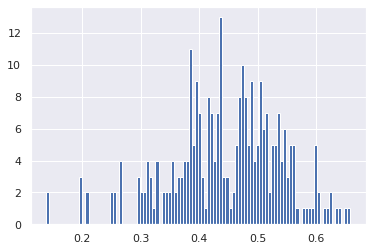

In [18]:
def get_closest_neighbor_distance(data, method = 'cosine'):

    data_values = data.drop(['sample_id', 'treatment'], axis=1).values
    data = StandardScaler().fit_transform(data_values)

    pairwiseDistances = pairwise_distances(data, metric=method)
    print(pairwiseDistances)

    pairwiseDistances[pairwiseDistances == 0.0] = np.inf
    disList = pairwiseDistances.min(axis = 1)

    import matplotlib.pyplot as plt
    plt.hist(disList, bins=100)
    plt.show()

dataForSubclustering = dataOrigionalNormalized
dfData = dataForSubclustering.pivot_table(index=['sample_id','treatment'], columns='ab_name', values='ab_count_tmm').reset_index()

get_closest_neighbor_distance(dfData)

In [51]:
%%capture

#GENERATE PERMUTATION ANALYSIS
#permute randomly group/cell annotation

#RANDOM SHUFFLED LABELS
theta = 0.01
results = []
errorList = []
for i in range(10):
    rglob, rtot, cell_annot, tx_annot, group_annot = prepare_data(data)
    group_annot = shuffle_group_label(group_annot)

    #scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)
    scd = scmra.ScData(rglob=rglob, rtot = rtot, group_annot= group_annot)

    p = scmra.ScCnrProblem(scd, eta=0.0, theta=theta, prior_network = CANNONICAL_EDGES) 
    p.cpx.solve()
    s = scmra.ScCnrResult(p)
    results.append(s)

    n_res = np.size(s.residuals_complete) + np.size(s.residuals_incomplete)
    error = 0
    error += np.sum(np.array(np.square(s.residuals_complete)))/n_res
    error += np.sum(np.array(np.square(s.residuals_incomplete)))/n_res
    errorList.append(error)

#ONE TRUE EXAMPLE
trueError = 0
rglob, rtot, cell_annot, tx_annot, group_annot = prepare_data(data)
#scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)
scd = scmra.ScData(rglob=rglob, rtot = rtot, group_annot= group_annot)
p = scmra.ScCnrProblem(scd, eta=0.0, theta=theta, prior_network = CANNONICAL_EDGES) 
p.cpx.solve()
s = scmra.ScCnrResult(p)
trueResult = s

n_res = np.size(s.residuals_complete) + np.size(s.residuals_incomplete)
error = 0
error += np.sum(np.array(np.square(s.residuals_complete)))/n_res
error += np.sum(np.array(np.square(s.residuals_incomplete)))/n_res
trueError = error

NameError: name 'prepare_data' is not defined

SMALL PERMUTATION ANALYSIS TO CHECK HOW SIGNIFICANT THE RESULTS R

__________________________________________

write permutation pickle into a R-Studio importable table

         Error  ErrorType
1000  0.038419  trueError


/tmp/ipykernel_1535701/2818296337.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


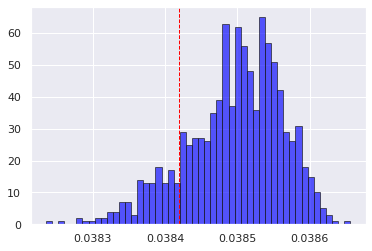

In [2]:
#PLOT THE PERMUTATION DATA

#redefine the resuklt calss to be able to load in pickle
class Result:

    trueError = None
    randomErrorList = None
    theta = None

name = "/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/bin/PERMUTATION_DATA_EGFR_INH.pickle"
data = pickle.load(open(name, 'rb'))

d = {"Error" : data.randomErrorList}
df = pd.DataFrame(data = d)
df["ErrorType"] = "randomError"
df2 = pd.DataFrame({"Error" : data.trueError,"ErrorType" : "trueError"}, index=[1000])
df = df.append(df2)

print(df2)

df.to_csv('../bin/permutation.txt', sep = '\t')

plt.hist(data.randomErrorList,bins=50,color='blue', edgecolor='k', alpha=0.65)
plt.axvline(data.trueError, color='red', linestyle='dashed', linewidth=1)

CLUSTER ANALYSIS (LEIDEN CLSUTERING) to find subgroups in the data, which shall be used as input for scCNR
 In the end we did not futher sub-clustering but only used treated/ un-treated populations
__________________________________________________

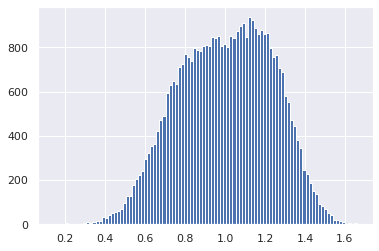

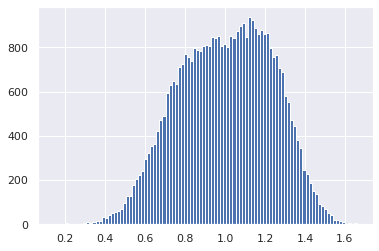

0.0116432207825219
ab_name  ab_name    sample_id treatment  Akt-p_4060  Akt123-p      Akt2  \
0              0  plate_1_154         X    0.002152  0.002886  0.003034   
1              1  plate_1_155         X    0.003435  0.002632  0.002998   
2              2  plate_1_156         X    0.003616  0.003481  0.003073   
3              3  plate_1_158         X    0.002284  0.002471  0.003114   
4              4  plate_1_159         X    0.002569  0.003077  0.003292   
..           ...          ...       ...         ...       ...       ...   
277          277  plate_6_235         X    0.003287  0.001921  0.003761   
278          278  plate_6_237         X    0.002616  0.002673  0.003076   
279          279  plate_6_238         X    0.002604  0.003256  0.003860   
280          280  plate_6_239         X    0.002131  0.002373  0.002594   
281          281  plate_6_241         X    0.002314  0.003177  0.003251   

ab_name    BMP2_4    BMPRII      CDK4    CREB-p  ...     Src-p    cFos-p  \
0   

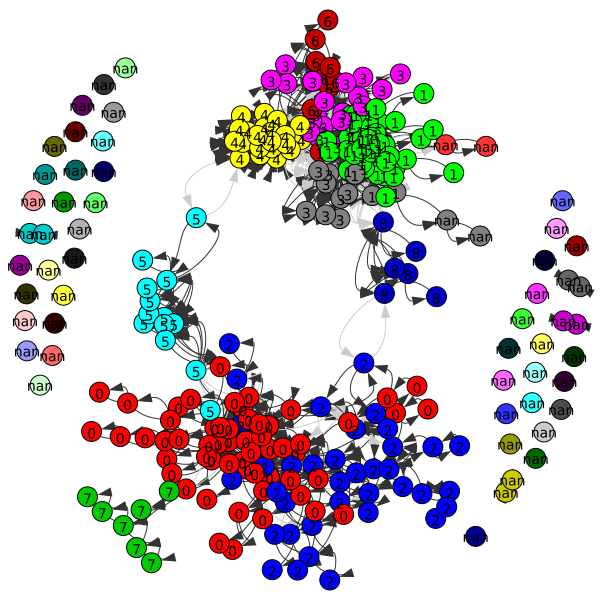

In [61]:
#LEIDEN CLSUTERING ON THIS DATA
import igraph as ig
import leidenalg as la

dataForSubclustering = dataOrigionalNormalized

dfData = dataForSubclustering.pivot_table(index=['sample_id','treatment'], columns='ab_name', values='ab_count_tmm').reset_index()
#get pairwise distances zscore normalizes itself, and drops sample, and treatment column
adjMat = get_pairwise_distances(dfData, method = "cosine", minmax=False)
weightMat = get_pairwise_distances(dfData, method = "cosine", minmax=False)

dfData["previousTreatment"] = dfData["treatment"]

#MAKE A BINARY ADJACENCY MATRIX
threshold = 0.54
adjMat[adjMat > threshold] = 0
adjMat[adjMat > 0] = 1

adjMat = np.asmatrix(adjMat)
G = ig.Graph.Adjacency(adjMat)

#make an edge list with weights for Leiden clustering
edgeList = (G.get_edgelist())
weightVec = []
for edge in edgeList:
    weightVec.append(weightMat[edge[0], edge[1]])

partition = la.find_partition(G, la.ModularityVertexPartition,n_iterations=200, weights = weightVec)
partition_2 = la.find_partition(G, la.ModularityVertexPartition,n_iterations=20)

#labels by hand
x = dfData["PLC-g2-p"].values
print(max(x))
x[x < max(x)-0.009] = 0
x = dfData["treatment"].values
x[x=="vehicle"] = ""
x[x == "AG1478"] = "X"
treatmentLabel = x

#label the cluster name
partitionVec = []
clusterDict = {}
pNum = (0)
for p in partition:
    if(len(p) < 5): continue
    curList = []
    for node in p:
        curList.append(str(node))
        clusterDict[node] = str(pNum)
    partitionVec.append((curList))
    pNum += 1
tmp = dfData.copy()
tmp.reset_index(inplace=True)
tmp = tmp.rename(columns = {'index':'ab_name'})
x = tmp["ab_name"].map(clusterDict)

#map cluster IDs back to sample_ids
dfData.reset_index(inplace=True)
dfData = dfData.rename(columns = {'index':'ab_name'})
dfData["cluster"] = dfData["ab_name"].map(clusterDict)

print(dfData)
#we removed some cells that were in a clsuter of only ONE cell

dfData = dfData.dropna()

dfData.to_csv('../bin/GraphDataCosine.txt', sep = '\t')

#PLOT the grapoh with cutoff with fully connected labels
ig.plot(partition_2, vertex_label = x, seed = 1) 

In [57]:
ig.plot(partition, vertex_label = treatmentLabel, seed = 1) 


In [27]:
ig.plot(partition, vertex_label = x, seed = 1) 


OUTLIER REMOVAL:

we tried many things, finally keeping cells based on Standard-deviation

In [2]:
'''def assign_leiden_clsuters():
    # write final data - WITH 3 GROUPS
    finalProcessedEGFRInhData = finalProcessedEGFRInhData[((finalProcessedEGFRInhData["treatmentIndicator"] == "X") & (finalProcessedEGFRInhData["cluster"] == "0")) |
                                                        ((finalProcessedEGFRInhData["treatmentIndicator"] == "") & (finalProcessedEGFRInhData["cluster"] == "1"))  |
                                                        ((finalProcessedEGFRInhData["treatmentIndicator"] == "") & (finalProcessedEGFRInhData["cluster"] == "2"))  ]
    finalProcessedEGFRInhData['cluster'].replace({'0': 'AG1478', '1': 'vehicle', '2': 'vehiclepRB'},inplace=True)
    finalProcessedEGFRInhData = finalProcessedEGFRInhData[["sample_id", "cluster", "ab_count_tmm", "ab_name"]]
    finalProcessedEGFRInhData = finalProcessedEGFRInhData.rename(columns={'cluster': 'treatment'})'''

#uses treatment annotation of Leiden clustering, where cells are removed, that r nans
#not close to other cells
def process_data_removing_nans():
    joinClusterFrame = dfData[["sample_id", "cluster", "treatment"]]
    joinClusterFrame.fillna('', inplace=True)
    joinClusterFrame['treatment'] = joinClusterFrame['treatment'].astype(str)
    joinClusterFrame['cluster'] = joinClusterFrame['cluster'].astype(str)

    joinClusterFrame = joinClusterFrame.rename(columns={'treatment': 'treatmentIndicator'})

    finalProcessedEGFRInhData = dataOrigionalNormalized[["sample_id", "treatment","ab_count_tmm","ab_name"]]
    finalProcessedEGFRInhData = pd.merge(finalProcessedEGFRInhData, joinClusterFrame, left_on='sample_id', right_on='sample_id')

    finalProcessedEGFRInhData['treatmentIndicator'].replace({'X': 'AG1478', '': 'vehicle'},inplace=True)
    finalProcessedEGFRInhData['cluster'] = finalProcessedEGFRInhData['treatmentIndicator']
    finalProcessedEGFRInhData = finalProcessedEGFRInhData[["sample_id", "treatment", "ab_count_tmm", "ab_name"]]
    finalProcessedEGFRInhData = finalProcessedEGFRInhData.rename(columns={'cluster': 'treatment'})
    return(finalProcessedEGFRInhData)

def process_data():
    data = dataOrigionalNormalized[["sample_id", "treatment","ab_count_tmm","ab_name"]]
    return(data)

#REMOVE OUTLIERS BY STD FROM MEAN
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

#REMOVE OUTLIERS BY IQR RULE (1.5 Q from MEDIAN)
'''def remove_outlier_IQR(dfAll):
    cols = dfAll.columns
    concatenatedFrame = pd.DataFrame(columns = cols)
    for prot in np.unique(dfAll["ab_name"]):
        df = dfAll[dfAll["ab_name"] == prot]
        Q1=df.quantile(0.25)
        Q3=df.quantile(0.75)
        IQR=Q3-Q1
        localProteinFrame=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
        concatenatedFrame = pd.concat([concatenatedFrame, localProteinFrame], axis=0)
    return concatenatedFrame
finalProcessedEGFRInhData = remove_outlier_IQR(finalProcessedEGFRInhData)
finalProcessedEGFRInhData = finalProcessedEGFRInhData.dropna()
print(finalProcessedEGFRInhData)'''

processedData = process_data()
outliers = (processedData.groupby(['treatment','ab_name'])['ab_count_tmm'].apply(is_outlier))
print(len(processedData[ (processedData["treatment"] == "AG1478") & (processedData["ab_name"] == "Rb-p") ]))
print(len(processedData[ (processedData["treatment"] == "vehicle") & (processedData["ab_name"] == "Rb-p") ]))

print("OUTLIUERS:")
outlierDataFrame = (processedData[outliers])
finalProcessedEGFRInhData = processedData[~processedData["sample_id"].isin(outlierDataFrame["sample_id"])]
print(np.unique(outlierDataFrame["sample_id"]))

finalProcessedEGFRInhData.to_csv("../bin/EGFRInhibitionDataProcessed.tsv", sep="\t")

print("CELL NUM:")
print(len(finalProcessedEGFRInhData[ (finalProcessedEGFRInhData["treatment"] == "AG1478") & (finalProcessedEGFRInhData["ab_name"] == "Rb-p") ]))
print(len(finalProcessedEGFRInhData[ (finalProcessedEGFRInhData["treatment"] == "vehicle") & (finalProcessedEGFRInhData["ab_name"] == "Rb-p") ]))

print("PHOSPHO RB COUNTS:")
#CHECK SUBGROUP 2: IF THE SUBGROUP IS REALLY THE RB-p HIGH ONE !!!
print(np.mean(finalProcessedEGFRInhData[ (finalProcessedEGFRInhData["treatment"] == "vehicle") & (finalProcessedEGFRInhData["ab_name"] == "Rb-p") ]["ab_count_tmm"]))
print(np.mean(finalProcessedEGFRInhData[ (finalProcessedEGFRInhData["treatment"] == "AG1478") & (finalProcessedEGFRInhData["ab_name"] == "Rb-p") ]["ab_count_tmm"]))

#CHECK SUBGROUP1:
print(np.mean(finalProcessedEGFRInhData[ (finalProcessedEGFRInhData["treatment"] == "vehicle") & (finalProcessedEGFRInhData["ab_name"] == "NFKB-p65-p") ]["ab_count_tmm"]))
print(np.mean(finalProcessedEGFRInhData[ (finalProcessedEGFRInhData["treatment"] == "vehiclepRB") & (finalProcessedEGFRInhData["ab_name"] == "NFKB-p65-p") ]["ab_count_tmm"]))

print((finalProcessedEGFRInhData[ (finalProcessedEGFRInhData["treatment"] == "vehicle") & (finalProcessedEGFRInhData["ab_name"] == "ITGB1") ]["ab_count_tmm"]))
print(np.mean(finalProcessedEGFRInhData[ (finalProcessedEGFRInhData["treatment"] == "vehicle") & (finalProcessedEGFRInhData["ab_name"] == "ITGB1") ]["ab_count_tmm"]))
print(np.mean(finalProcessedEGFRInhData[ (finalProcessedEGFRInhData["treatment"] == "vehiclepRB") & (finalProcessedEGFRInhData["ab_name"] == "ITGB1") ]["ab_count_tmm"]))

164
118
OUTLIUERS:
['plate_1_154' 'plate_1_165' 'plate_1_174' 'plate_1_176' 'plate_1_186'
 'plate_1_189' 'plate_1_192' 'plate_1_224' 'plate_1_231' 'plate_1_239'
 'plate_1_243' 'plate_2_161' 'plate_2_169' 'plate_2_176' 'plate_2_185'
 'plate_2_190' 'plate_2_197' 'plate_2_202' 'plate_2_211' 'plate_2_221'
 'plate_2_222' 'plate_2_234' 'plate_2_245' 'plate_2_246' 'plate_3_176'
 'plate_3_192' 'plate_3_216' 'plate_3_242' 'plate_3_246' 'plate_4_156'
 'plate_4_163' 'plate_4_169' 'plate_4_188' 'plate_4_191' 'plate_4_198'
 'plate_4_201' 'plate_4_212' 'plate_4_228' 'plate_4_236' 'plate_4_237'
 'plate_5_151' 'plate_5_152' 'plate_5_161' 'plate_5_168' 'plate_5_174'
 'plate_5_175' 'plate_5_176' 'plate_5_179' 'plate_5_181' 'plate_5_182'
 'plate_5_193' 'plate_5_202' 'plate_5_203' 'plate_5_214' 'plate_5_240'
 'plate_5_244' 'plate_5_246' 'plate_6_153' 'plate_6_159' 'plate_6_162'
 'plate_6_173' 'plate_6_177' 'plate_6_197' 'plate_6_199' 'plate_6_213'
 'plate_6_219' 'plate_6_225' 'plate_6_226' 'plate_6_235' '

/tmp/ipykernel_2356702/1588879931.py:56: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  outliers = (processedData.groupby(['treatment','ab_name'])['ab_count_tmm'].apply(is_outlier))


In [5]:
edgeList = pd.DataFrame()
targetList = []
sourceList = []
duplicateList = []
for edge in G.es:
  source_vertex_id = edge.source
  target_vertex_id = edge.target
  reversedEdge = str(target_vertex_id) + "_" + str(source_vertex_id)
  if(not reversedEdge in duplicateList):
    duplicateList.append(str(source_vertex_id) + "_" + str(target_vertex_id))
    sourceList.append(source_vertex_id)    
    targetList.append(target_vertex_id)
edgeList["source"] = sourceList
edgeList["target"] = targetList

nodeLabel = pd.DataFrame()
nodeLabel["node"] = x.index
nodeLabel["cluster"] = x

edgeList.to_csv('../bin/GraphEdges.txt', sep = '\t')
nodeLabel.to_csv('../bin/GraphNodeCluster.txt', sep = '\t')


In [6]:
#WE DO NOT KEEP THE SMALL CLUSTERS
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 2 

data = dfData.drop(['sample_id', 'treatment','ab_name','cluster'], axis=1)
dataTrans = StandardScaler().fit_transform(data)
data = pd.DataFrame(dataTrans, index=data.index, columns=data.columns)

print(data)

adata = sc.AnnData(data)
adata.obs['cluster'] = dfData['cluster'].apply(str).astype('category').to_numpy()
adata.obs['treatment'] = dfData['treatment']
adata.obs['sample_name'] = dfData['sample_id']       

sc.tl.rank_genes_groups(adata, 'cluster', method='wilcoxon', key_added = "wilcoxon")

ab_name  Akt-p_4060  Akt123-p      Akt2    BMP2_4    BMPRII      CDK4  \
0         -1.262226 -0.240188 -0.400952  0.341901  0.787820  0.181979   
1          0.022745 -1.071068 -1.015483 -0.711543  0.795600 -0.083345   
2          0.657798  0.751935 -0.328429 -1.228674  0.723954  1.073116   
3         -1.014595 -0.828402 -0.087945 -0.050183  0.725327  0.386131   
4         -0.642010  0.192621  0.243827  0.401576  1.836080  0.783477   
..              ...       ...       ...       ...       ...       ...   
277       -0.045368 -2.084356  0.564297  1.017237  0.220364 -0.027322   
278       -0.664007 -0.622733 -0.333425 -0.299140  0.608466  0.530277   
279       -1.055038 -0.191910  0.416268 -0.654017  0.099062 -0.561408   
280       -1.444466 -1.306814 -1.514473 -0.527772  1.135604  0.876286   
281       -1.238648 -0.050925 -0.335927 -1.132869  0.593484  0.176649   

ab_name    CREB-p      Cdc2  Cyclin-B1  Cyclin-E  ...    cFos-p    cJun-p  \
0       -0.710626  1.145714   0.670872  1.0797

/tmp/ipykernel_588664/3490629880.py:15: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(data)
/home/t.stohn/miniconda3/envs/mra-analysis/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/t.stohn/miniconda3/envs/mra-analysis/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/t.stohn/miniconda3/envs/mra-analysis/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/t.stohn/minicond

##########
THETA analysis to find the right theta

We see that error drops massively in the beginning, then does not change a lot due to pRB. Pick a theta so that we do not recover too many different edges, but at the same time capture most of the error drop.

In [2]:
#%%capture
#ESTIMATE THE RIGHT THETA
clusteredData = pd.read_csv("../bin/EGFRInhibitionDataProcessed.tsv", sep = "\t")

evenValues = np.array(np.linspace(0.0001, 0.05, 20))
thetaRange = np.concatenate(([0.0005, 0.001, 0.0015, 0.002, 0.009], evenValues))

thetaRange = [0.009]

results = []
errorList = []
diffEdgeListTreat = []

for theta in thetaRange:
    rglob, rtot, cell_annot, tx_annot, group_annot = prepare_data_for_EGFR_inhibition(clusteredData)
    
    #WE DO NOT WANT ANY TREATMENT ANNOTATION!!!
    #scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)
    scd = scmra.ScData(rglob=rglob, rtot = rtot, group_annot= group_annot)

    p = scmra.ScCnrProblem(scd, eta=0.0, theta=theta, prior_network = CANNONICAL_EDGES) 
    p.cpx.solve()
    s = scmra.ScCnrResult(p)
    results.append(s)

    n_res = np.size(s.residuals_complete) + np.size(s.residuals_incomplete)
    error = 0
    error += np.sum(np.array(np.square(s.residuals_complete)))
    error += np.sum(np.array(np.square(s.residuals_incomplete)))
    error = error/ n_res
    errorList.append(error)

    var_names = p.cpx.variables.get_names()
    vars_lst = [var for var in var_names if var.startswith('IDev')]
    var_vals = p.cpx.solution.pool.get_values(0, vars_lst)
    lengthIdcs = (np.count_nonzero(var_vals))
    diffEdgeListTreat.append(lengthIdcs)

    #diffMatrix = np.array(s.rloc["vehicle"]-s.rloc["vehiclepRB"])
    #diffMatrix = (diffMatrix.flatten())
    #x = [i for i, e in enumerate(diffMatrix) if e != 0]
    #diffEdgeListpRB.append(len(x))

{'vehicle': array(['plate.1.162', 'plate.1.169', 'plate.1.171', 'plate.1.179',
       'plate.1.190', 'plate.1.191', 'plate.1.196', 'plate.1.199',
       'plate.1.203', 'plate.1.205', 'plate.1.212', 'plate.1.213',
       'plate.1.215', 'plate.1.230', 'plate.1.233', 'plate.1.234',
       'plate.1.244', 'plate.2.152', 'plate.2.155', 'plate.2.159',
       'plate.2.170', 'plate.2.173', 'plate.2.180', 'plate.2.187',
       'plate.2.192', 'plate.2.193', 'plate.2.203', 'plate.2.204',
       'plate.2.212', 'plate.2.214', 'plate.2.224', 'plate.2.225',
       'plate.2.235', 'plate.3.164', 'plate.3.166', 'plate.3.173',
       'plate.3.182', 'plate.3.184', 'plate.3.185', 'plate.3.187',
       'plate.3.191', 'plate.3.199', 'plate.3.204', 'plate.3.206',
       'plate.3.209', 'plate.3.213', 'plate.3.225', 'plate.3.227',
       'plate.3.231', 'plate.3.237', 'plate.4.162', 'plate.4.168',
       'plate.4.181', 'plate.4.187', 'plate.4.200', 'plate.4.202',
       'plate.4.207', 'plate.4.210', 'plate.4.211'

/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/4_EGFR_INHIBITOR/../../helperScripts/IDseqHelperFunctions.py:404: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  rglob_cnr = rglob_cnr.sum(level=0) #sum rows of same index (e.g. two ABs measure same protein)
/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/4_EGFR_INHIBITOR/../../helperScripts/IDseqHelperFunctions.py:413: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  rtot_cnr = rtot_cnr.sum(level=0) #sum rows of same index (e.g. two ABs measure same protein)


Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 562.487589 after 0.00 sec. (0.72 ticks)
Tried aggregator 2 times.
MIQP Presolve eliminated 7442 rows and 11583 columns.
Aggregator did 11 substitutions.
Reduced MIQP has 2299 rows, 2310 columns, and 4598 nonzeros.
Reduced MIQP has 0 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQP objective Q matrix has 2310 nonzeros.
Presolve time = 0.02 sec. (10.37 ticks)
Tried aggregator 1 time.
MIQP Presolve eliminated 2090 rows and 2100 columns.
Reduced MIQP has 209 rows, 210 columns, and 418 nonzeros.
Reduced MIQP has 0 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQP objective Q matrix has 210 nonzeros.
Presolve time = 0.01 sec. (1.35 ticks)
Tried aggregator 1 time.
Reduced MIQP has 209 rows, 210 columns, and 418 nonzeros.
Reduced MIQP has 0 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQP objective Q matrix has 210 nonzeros.
Presol

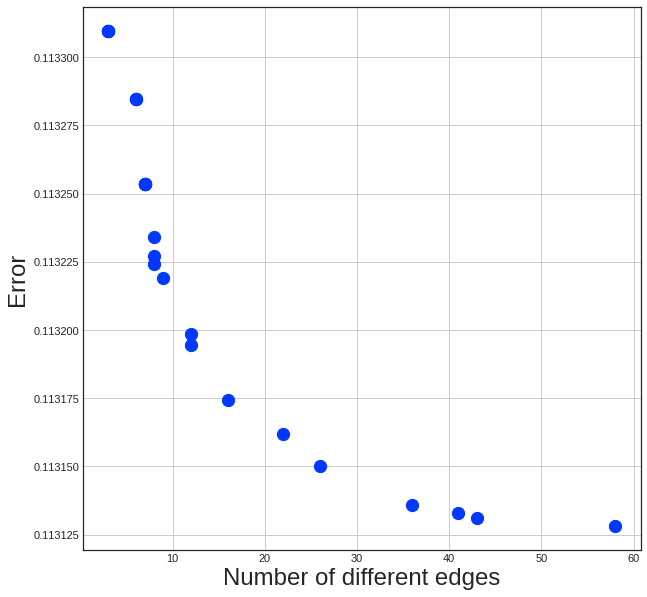

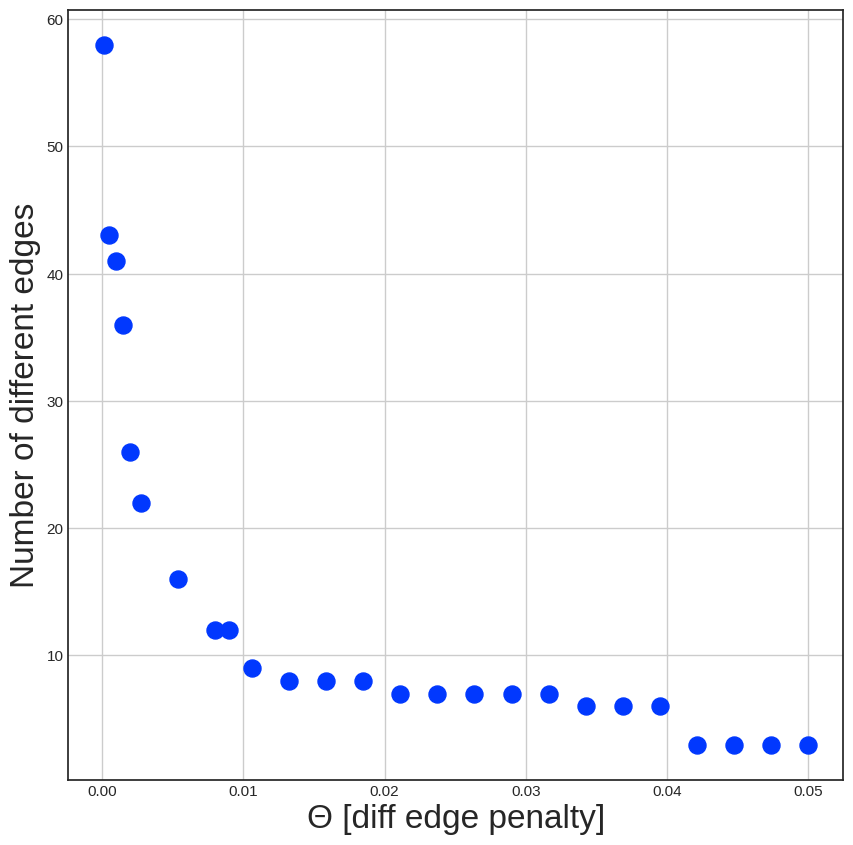

[43, 41, 36, 26, 12, 58, 22, 16, 12, 9, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 3, 3, 3, 3]
[0.0005     0.001      0.0015     0.002      0.009      0.0001
 0.00272632 0.00535263 0.00797895 0.01060526 0.01323158 0.01585789
 0.01848421 0.02111053 0.02373684 0.02636316 0.02898947 0.03161579
 0.03424211 0.03686842 0.03949474 0.04212105 0.04474737 0.04737368
 0.05      ]


In [5]:

df = pd.DataFrame({'#DifferentEdges': diffEdgeListTreat, 'AvgAbsoluteResiduals': errorList, "ThetaRange":thetaRange})
df.to_csv('../bin/thetaEstimation.tsv', sep = '\t')

with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    f, ax = plt.subplots(figsize=(10, 10))
    wt = ax.scatter(diffEdgeListTreat, errorList, color = "#0138FE", s = 150)
    ax.plot(ls="--", c=".3")
    plt.xlabel('Number of different edges', size = 24)
    plt.ylabel('Error', size = 24)
    plt.show()

with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    f, ax = plt.subplots(figsize=(10, 10))
    wt = ax.scatter(thetaRange, diffEdgeListTreat, color = "#0138FE", s = 150)
    ax.plot(ls="--", c=".3")
    plt.xlabel('Θ [diff edge penalty]', size = 24)
    plt.ylabel('Number of different edges', size = 24)
    plt.show()

print(diffEdgeListTreat)
print(thetaRange)

GENERATE THE scCNR ANALYSIS FOR SUBGROUPS, MAINLY GENERATING:

________________

1.) MASTER RLOCS FOR 2 SUBGROUPS

2.) DIFF RLOCS FOR COMAPRISONS TO VEHICLE

In [4]:
%%capture

#global scCNR parameters

THETA = 0.009 #GLOBALTHETA_EGFRINH

finalProcessedEGFRInhData = pd.read_csv("../bin/EGFRInhibitionDataProcessed.tsv",sep='\t')
results = []
errorList = []
rglob, rtot, cell_annot, tx_annot, group_annot = prepare_data_for_EGFR_inhibition(finalProcessedEGFRInhData)
assert(cell_annot is None)
assert(tx_annot is None)

scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)

p = scmra.ScCnrProblem(scd, eta=0.0, theta=THETA, prior_network = CANNONICAL_EDGES) 
p.cpx.solve()
s = scmra.ScCnrResult(p)

#STORE THE RECONSTRUCTED RLOCS
s.rloc["vehicle"].to_csv("../bin/MASTERCNR_EGFRINH_rloc_vehicle.tsv", sep = "\t")
#s.rloc["vehiclepRB"].to_csv("../bin/MASTERCNR_EGFRINH_rloc_vehiclepRB.tsv", sep = "\t")
s.rloc["AG1478"].to_csv("../bin/MASTERCNR_EGFRINH_rloc_AG1478.tsv", sep = "\t")

#STORE THE RECONSTRUCTED DIFFERENCES OF RLOCS
diffRlocEGFRInh, numDifferencesP = return_true_difference_rloc(s.rloc["vehicle"], s.rloc["AG1478"], s)
#diffRlocpRB, numDifferencesD = return_true_difference_rloc(s.rloc["vehicle"], s.rloc["vehiclepRB"], s)

diffRlocEGFRInh.to_csv("../bin/MASTERCNR_difference_rloc_EGFRInhibited.tsv", sep = "\t")
#diffRlocpRB.to_csv("../bin/MASTERCNR_difference_rloc_vehiclepRB.tsv", sep = "\t")

#STORE THE RESULT AS PICKLE (e.g. for alter comparison to MASTERCNR error)
folder = "../bin/"
name = "MASTERCNR_EGFRINH_CNRRESULT"
pickleFile = folder + name + ".pickle"
pickle.dump(s, open(pickleFile, 'wb'))

#SOME OUTPUT JUST FOR QUALITY CHECKING

#NUMBER OF FDIFFERENT EDGES
deviatingEdgeNum = 0
indicatorList = []
for indicator, status in s.vardict.items():
    if(indicator.startswith(("IDev")) and status==1):
        indicatorList.append(indicator)
        deviatingEdgeNum = deviatingEdgeNum + 1
print(deviatingEdgeNum)

#THE ACTUAL ERROR SCORE
n_res = np.size(s.residuals_complete) + np.size(s.residuals_incomplete)
error = 0
error += np.sum(np.array(np.square(s.residuals_complete)))/n_res
error += np.sum(np.array(np.square(s.residuals_incomplete)))/n_res
trueError = error
print(error)

In [5]:
print(deviatingEdgeNum)
print(indicatorList)

12
['IDev_RB_CDC2', 'IDev_JNK_EGFRY1173', 'IDev_AKT1_EGFRY1173', 'IDev_GSK3B_RPS6', 'IDev_AKT123_MTOR', 'IDev_AKT123_MAPKAP2', 'IDev_CJUN_JNK', 'IDev_SRC_EGFRY1045', 'IDev_AKT123_EGFRY1173', 'IDev_RB_CDK4', 'IDev_RELA_IKBA', 'IDev_P38D_MKK36']


{'vehicle': array(['plate.1.162', 'plate.1.169', 'plate.1.171', 'plate.1.179',
       'plate.1.190', 'plate.1.191', 'plate.1.196', 'plate.1.199',
       'plate.1.203', 'plate.1.205', 'plate.1.212', 'plate.1.213',
       'plate.1.215', 'plate.1.230', 'plate.1.233', 'plate.1.234',
       'plate.1.244', 'plate.2.152', 'plate.2.155', 'plate.2.159',
       'plate.2.170', 'plate.2.173', 'plate.2.180', 'plate.2.187',
       'plate.2.192', 'plate.2.193', 'plate.2.203', 'plate.2.204',
       'plate.2.212', 'plate.2.214', 'plate.2.224', 'plate.2.225',
       'plate.2.235', 'plate.3.164', 'plate.3.166', 'plate.3.173',
       'plate.3.182', 'plate.3.184', 'plate.3.185', 'plate.3.187',
       'plate.3.191', 'plate.3.199', 'plate.3.204', 'plate.3.206',
       'plate.3.209', 'plate.3.213', 'plate.3.225', 'plate.3.227',
       'plate.3.231', 'plate.3.237', 'plate.4.162', 'plate.4.168',
       'plate.4.181', 'plate.4.187', 'plate.4.200', 'plate.4.202',
       'plate.4.207', 'plate.4.210', 'plate.4.211'

/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/4_EGFR_INHIBITOR/../../helperScripts/IDseqHelperFunctions.py:375: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  rglob_cnr = rglob_cnr.sum(level=0) #sum rows of same index (e.g. two ABs measure same protein)
/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/4_EGFR_INHIBITOR/../../helperScripts/IDseqHelperFunctions.py:384: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  rtot_cnr = rtot_cnr.sum(level=0) #sum rows of same index (e.g. two ABs measure same protein)


<AxesSubplot: xlabel='JNK', ylabel='CJUN'>

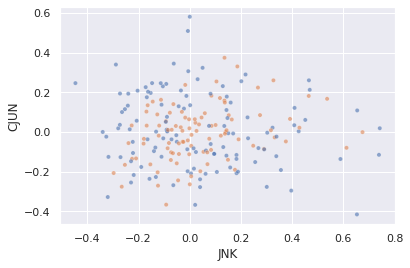

In [12]:
finalProcessedEpiDiffData = pd.read_csv("../bin/EGFRInhibitionDataProcessed.tsv",sep='\t')
rglob, rtot, cell_annot, tx_annot, group_annot = prepare_data_for_EGFR_inhibition(finalProcessedEpiDiffData)
newdict = {}
for key, value in group_annot.items():
    for string in value:
        newdict[string] = key
x=rglob.reset_index()
x = pd.melt(x, id_vars='index', value_vars=rglob.columns,
             var_name='VARIABLE', value_name='VALUE')
x.rename(columns = {'index':'PROTEIN'}, inplace = True)
x=x.pivot(index = "VARIABLE", columns='PROTEIN', values='VALUE')
x=x.reset_index()
x = x. replace({"VARIABLE": newdict})

print(x[x['VARIABLE'] == "vehiclepRB"]["RB"])

#sns.scatterplot(x="CDK4", y="RB",
#              hue="VARIABLE",
#              data=x, alpha = 0.6, size = 0.5, legend=False)

sns.scatterplot(x="JNK", y="CJUN",
              hue="VARIABLE",
              data=x, alpha = 0.6, size = 0.5, legend=False)

sns.scatterplot(x="JNK", y="AK",
hue="VARIABLE",
data=x, alpha = 0.6, size = 0.5, legend=False)

sns.scatterplot(x="JNK", y="CJUN",
hue="VARIABLE",
data=x, alpha = 0.6, size = 0.5, legend=False)

In [47]:
egfrInhDataProcessed = pd.read_csv("../bin/EGFRInhibitionDataProcessed.tsv",sep='\t')

vehicleData = (egfrInhDataProcessed[egfrInhDataProcessed["treatment"] == "vehicle"])
vehicleData = vehicleData.set_index(['sample_id',"treatment"])
vehicleData = vehicleData.pivot(columns='ab_name', values='ab_count_tmm')
samplingVehicle = vehicleData.sample(frac=1.0, replace=True, random_state=1)
proteinVars = samplingVehicle.columns
samplingVehicle = samplingVehicle.reset_index()
samplingVehicle = pd.melt(samplingVehicle, id_vars=["sample_id", "treatment"], value_vars=proteinVars)


treatedData = (egfrInhDataProcessed[egfrInhDataProcessed["treatment"] == "AG1478"])
treatedData = treatedData.set_index(['sample_id',"treatment"])
treatedData = treatedData.pivot(columns='ab_name', values='ab_count_tmm')
samplingTreated = treatedData.sample(frac=1.0, replace=True, random_state=1)
proteinVars = samplingTreated.columns
samplingTreated = samplingTreated.reset_index()
samplingTreated = pd.melt(samplingTreated, id_vars=["sample_id", "treatment"], value_vars=proteinVars)

frames = [samplingTreated, samplingVehicle]
result = pd.concat(frames)

print(len(np.unique(result["sample_id"])))
print(len(np.unique(egfrInhDataProcessed["sample_id"])))

133
197


In [19]:
def bootstrap_data(data):

    vehicleData = (data[data["treatment"] == "vehicle"])
    vehicleData = vehicleData.set_index(['sample_id',"treatment"])
    vehicleData = vehicleData.pivot(columns='ab_name', values='ab_count_tmm')
    samplingVehicle = vehicleData.sample(frac=1.0, replace=True)
    proteinVars = samplingVehicle.columns
    samplingVehicle = samplingVehicle.reset_index()
    #change sample id bcs of duplications
    samplingVehicle['range'] = (np.arange(len(samplingVehicle))).astype(str)
    samplingVehicle["sample_id"] = samplingVehicle["sample_id"] + samplingVehicle["range"]
    samplingVehicle = samplingVehicle.drop(['range'], axis=1)
    #remelt to origional format
    samplingVehicle = pd.melt(samplingVehicle, id_vars=["sample_id", "treatment"], value_vars=proteinVars)


    treatedData = (data[data["treatment"] == "AG1478"])
    treatedData = treatedData.set_index(['sample_id',"treatment"])
    treatedData = treatedData.pivot(columns='ab_name', values='ab_count_tmm')
    samplingTreated = treatedData.sample(frac=1.0, replace=True)
    proteinVars = samplingTreated.columns
    samplingTreated = samplingTreated.reset_index()
    #change sample id bcs of duplications
    samplingTreated['range'] = np.arange(len(samplingTreated)).astype(str)
    samplingTreated["sample_id"] = samplingTreated["sample_id"] + samplingTreated["range"]
    samplingTreated = samplingTreated.drop(['range'], axis=1)
    #remelt to origional format
    samplingTreated = pd.melt(samplingTreated, id_vars=["sample_id", "treatment"], value_vars=proteinVars)

    frames = [samplingTreated, samplingVehicle]
    result = pd.concat(frames)
    result = result.rename(columns={"value": "ab_count_tmm"})

    return(result)
    
egfrInhDataProcessed = pd.read_csv("../bin/EGFRInhibitionDataProcessed.tsv",sep='\t')

x = bootstrap_data(egfrInhDataProcessed)
rglob, rtot, cell_annot, tx_annot, group_annot = prepare_data_for_EGFR_inhibition(x)
newdict = {}
for key, value in group_annot.items():
    for string in value:
        newdict[string] = key
x=rglob.reset_index()
x = pd.melt(x, id_vars='index', value_vars=rglob.columns,
             var_name='VARIABLE', value_name='VALUE')
x.rename(columns = {'index':'PROTEIN'}, inplace = True)
x=x.pivot(index = "VARIABLE", columns='PROTEIN', values='VALUE')
x=x.reset_index()
x = x. replace({"VARIABLE": newdict})

scd = scmra.ScData(rglob=rglob, rtot = rtot, cell_annot=cell_annot, tx_annot=tx_annot, group_annot= group_annot)
p = scmra.ScCnrProblem(scd, eta=0.0, theta=THETA, prior_network = CANNONICAL_EDGES) 
p.cpx.solve()
s = scmra.ScCnrResult(p)
indicatorList = []
for indicator, status in s.vardict.items():
    if(indicator.startswith(("IDev")) and status==1):
        indicatorList.append(indicator)
print(indicatorList, flush=True)

sns.scatterplot(x="EGFR", y="AKT123",
              hue="VARIABLE",
              data=x, alpha = 0.6, size = 0.5, legend=False)

{'AG1478': array(['plate.1.15574', 'plate.1.16860', 'plate.1.16878',
       'plate.1.173108', 'plate.1.17311', 'plate.1.1773', 'plate.1.17741',
       'plate.1.17785', 'plate.1.17813', 'plate.1.18768', 'plate.1.18852',
       'plate.1.19486', 'plate.1.19497', 'plate.1.21158', 'plate.1.21445',
       'plate.1.22720', 'plate.1.22776', 'plate.1.22790', 'plate.1.22799',
       'plate.2.151102', 'plate.2.16418', 'plate.2.166112',
       'plate.2.16672', 'plate.2.1786', 'plate.2.18310', 'plate.2.19459',
       'plate.2.19477', 'plate.2.20163', 'plate.2.2050', 'plate.2.210107',
       'plate.2.21537', 'plate.2.2154', 'plate.2.21591', 'plate.2.22861',
       'plate.2.23096', 'plate.2.23614', 'plate.2.23654', 'plate.2.2367',
       'plate.3.17073', 'plate.3.17469', 'plate.3.175110',
       'plate.3.19412', 'plate.3.2005', 'plate.3.20055', 'plate.3.21046',
       'plate.3.21056', 'plate.3.22933', 'plate.3.23317', 'plate.3.23498',
       'plate.3.244114', 'plate.3.24431', 'plate.3.24442',
       

/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/4_EGFR_INHIBITOR/../../helperScripts/IDseqHelperFunctions.py:341: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  rglob_cnr = rglob_cnr.sum(level=0) #sum rows of same index (e.g. two ABs measure same protein)
/DATA/t.stohn/MRA/scMRA-analysis/notebooks/paperAnalyses/4_EGFR_INHIBITOR/../../helperScripts/IDseqHelperFunctions.py:350: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  rtot_cnr = rtot_cnr.sum(level=0) #sum rows of same index (e.g. two ABs measure same protein)


NameError: name 'THETA' is not defined